In [1]:
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('scaled_non_outlier_data_with_id.csv', encoding='iso-8859-1', index_col='Index')
df.head()

,TotalSpent,Frequency,DaysSinceLastPurchase,CustomerID
Index,,,,
2,0.702674,0.539499,-0.173023,12348.0
3,0.728062,-0.834041,-0.800375,12349.0
4,-0.725919,-0.834041,2.459615,12350.0
5,0.638297,1.913039,-0.609929,12352.0
6,-0.982677,-0.834041,1.272127,12353.0


Text(0.5, 0.92, 'Non-Outlier Data Visualization')

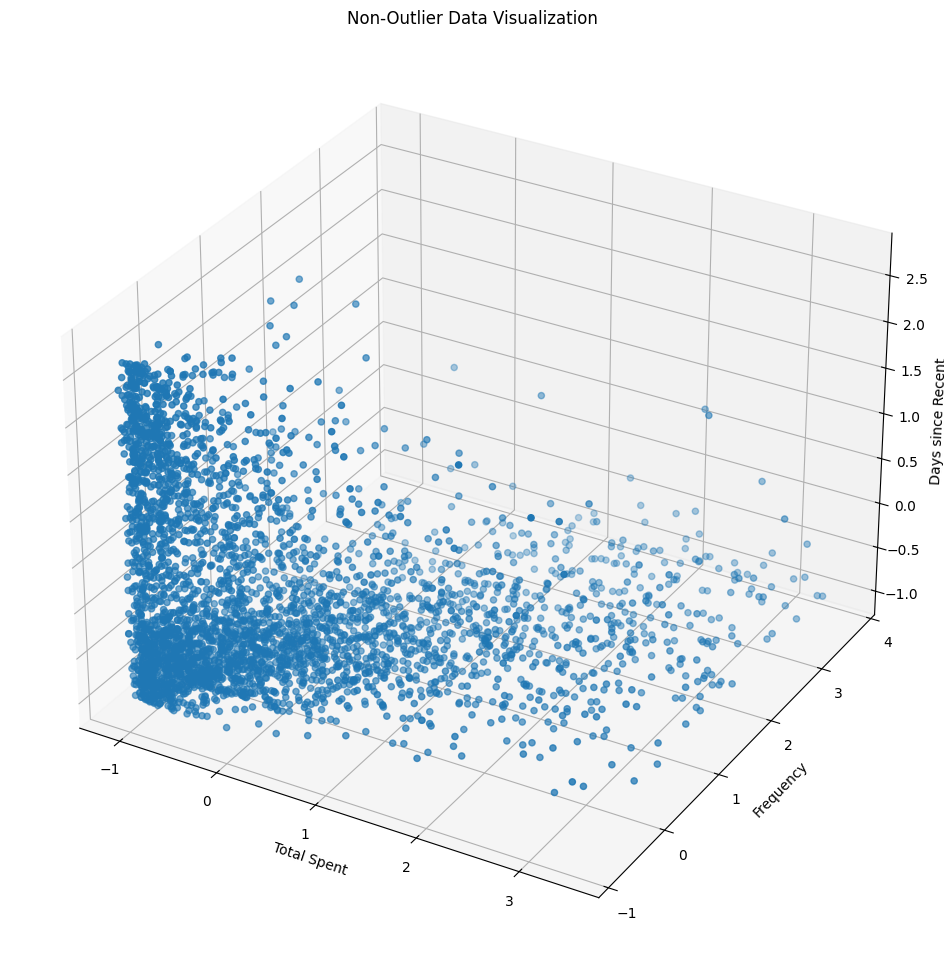

In [3]:

fig = plt.figure(figsize=(12, 12))

ax = fig.add_subplot(projection="3d")

scatter = ax.scatter(df["TotalSpent"], df["Frequency"], df["DaysSinceLastPurchase"])

ax.set_xlabel("Total Spent")
ax.set_ylabel("Frequency")
ax.set_zlabel("Days since Recent")
ax.set_title("Non-Outlier Data Visualization")

Berdasarkan training K Means sebelumnya, 4 Cluster adalah yang paling optimal, disini kita akan mencoba model clustering lain dan melihat hasilnya.

In [4]:
agglo_df = df.copy()
dbs_df = df.copy()
gaus_df = df.copy()
spec_df = df.copy()


In [5]:
agglo_df_train = agglo_df.drop(columns=['CustomerID'])
dbs_df_train = dbs_df.drop(columns=['CustomerID'])
gaus_df_train = gaus_df.drop(columns=['CustomerID'])
spec_df_train = spec_df.drop(columns=['CustomerID'])


In [6]:
clusters = 4

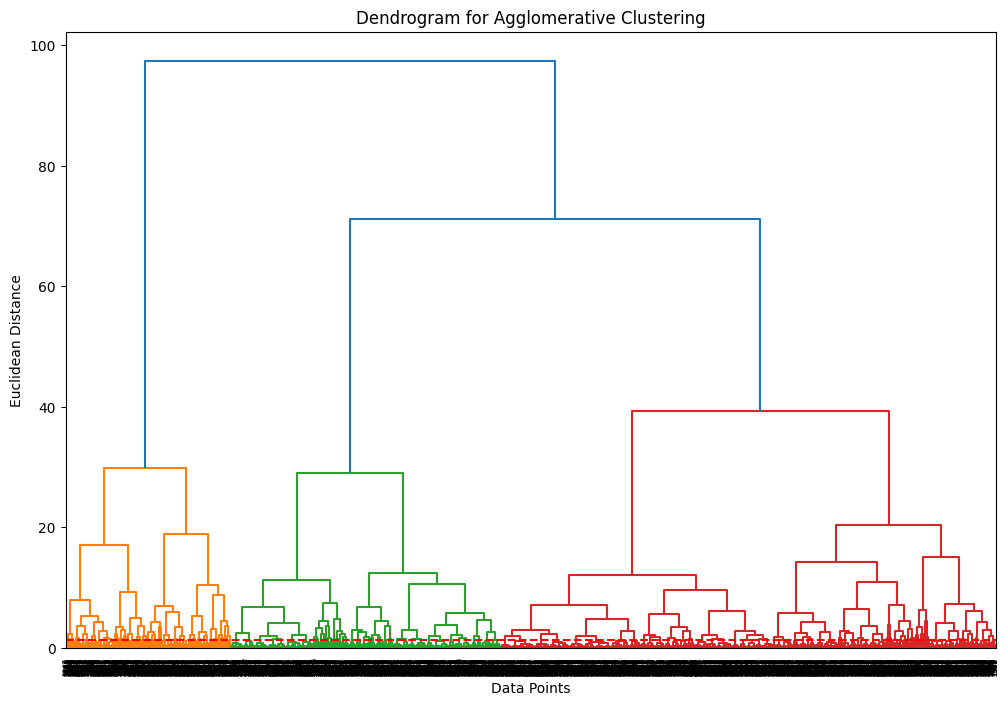

Agglomerative Clustering Performance Metrics:
Silhouette Score: 0.3533
Davies-Bouldin Index: 0.9630
Calinski-Harabasz Index: 3212.6213


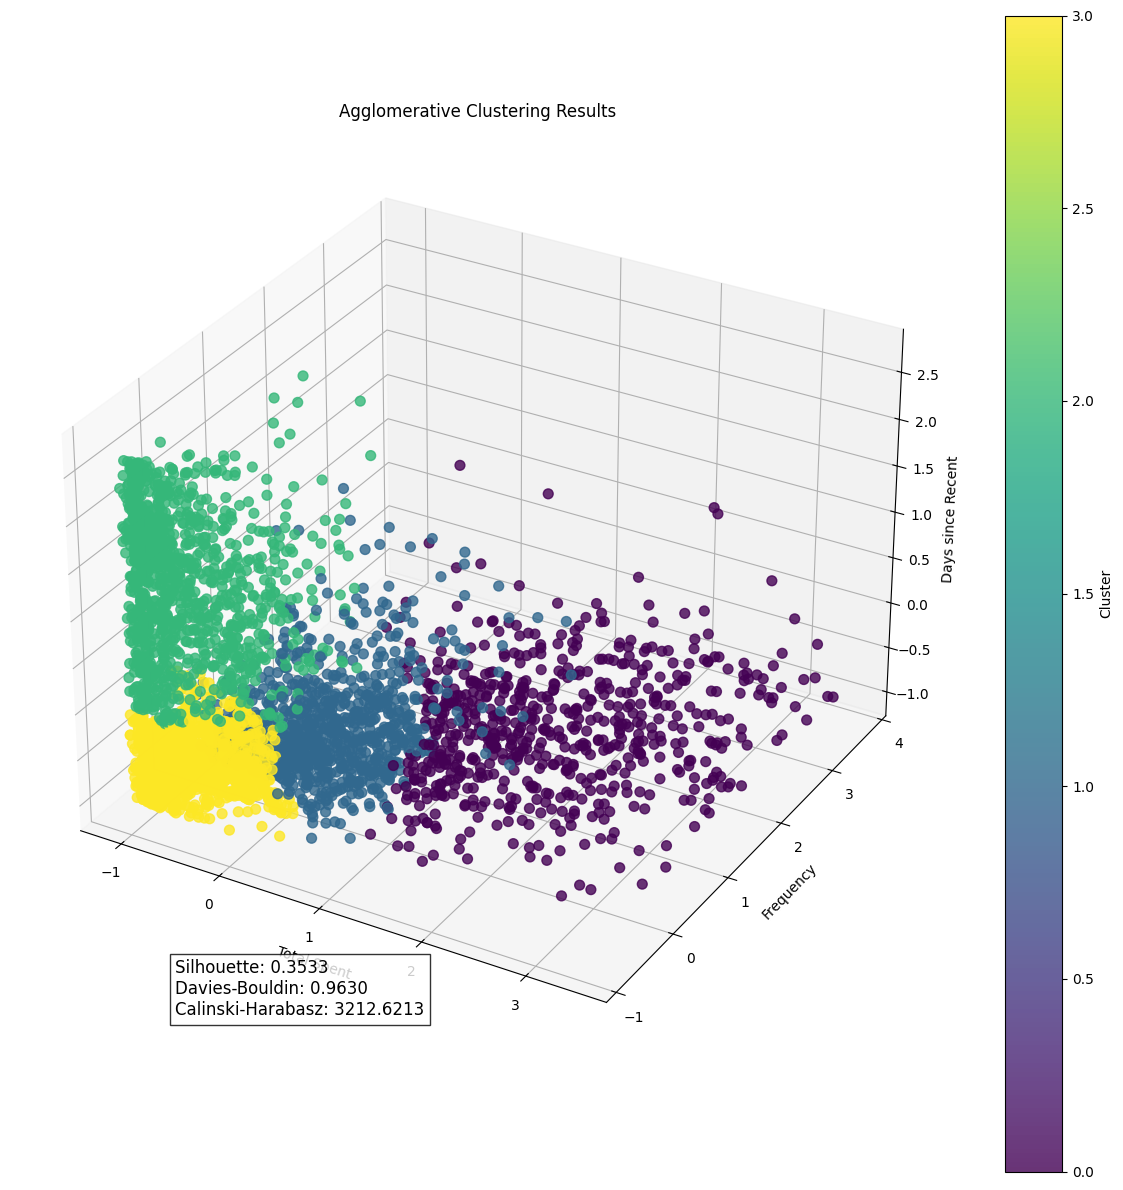

In [7]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(12, 8))
dendrogram = shc.dendrogram(shc.linkage(agglo_df_train, method='ward'))
plt.title('Dendrogram for Agglomerative Clustering')
plt.xlabel('Data Points')
plt.ylabel('Euclidean Distance')
plt.axhline(y=1.2, color='r', linestyle='--')  # Adjust this threshold as needed
plt.show()

# Perform Agglomerative Clustering
agglo_model = AgglomerativeClustering(n_clusters=clusters)
agglo_clusters = agglo_model.fit_predict(agglo_df_train)

agglo_df['Cluster'] = agglo_clusters

silhouette_avg = silhouette_score(agglo_df_train, agglo_clusters)
davies_bouldin = davies_bouldin_score(agglo_df_train, agglo_clusters)
calinski_harabasz = calinski_harabasz_score(agglo_df_train, agglo_clusters)

print("Agglomerative Clustering Performance Metrics:")
print(f"Silhouette Score: {silhouette_avg:.4f}")
print(f"Davies-Bouldin Index: {davies_bouldin:.4f}")
print(f"Calinski-Harabasz Index: {calinski_harabasz:.4f}")

fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(projection="3d")

scatter = ax.scatter(
    agglo_df["TotalSpent"], 
    agglo_df["Frequency"], 
    agglo_df["DaysSinceLastPurchase"],
    c=agglo_df["Cluster"],
    cmap='viridis',
    s=50,
    alpha=0.8
)

cbar = plt.colorbar(scatter)
cbar.set_label('Cluster')

ax.set_xlabel("Total Spent")
ax.set_ylabel("Frequency")
ax.set_zlabel("Days since Recent")
ax.set_title("Agglomerative Clustering Results")

metrics_text = f"Silhouette: {silhouette_avg:.4f}\nDavies-Bouldin: {davies_bouldin:.4f}\nCalinski-Harabasz: {calinski_harabasz:.4f}"
plt.figtext(0.15, 0.15, metrics_text, fontsize=12, bbox=dict(facecolor='white', alpha=0.8))

plt.tight_layout()


### Dendrogram:
#### Berdasarkan dendrogram tersebut, ketika hierarki terpisah, ada yang terpisah sedikit lebih tinggi (merah), dan jika dibuat garis horizontal dari tengah merah, akan melewati 4 garis vertikal, maka 4 cluster yang akan dipakai, sesuai juga dengan metode elbow dan silhouette sebelumnya.

### Cluster:
#### Hasil clustering mirip dengan yang ada di KMeans, cuma berbeda metriks saja

DBSCAN Clustering Results:
Number of clusters: 1
Number of noise points: 42


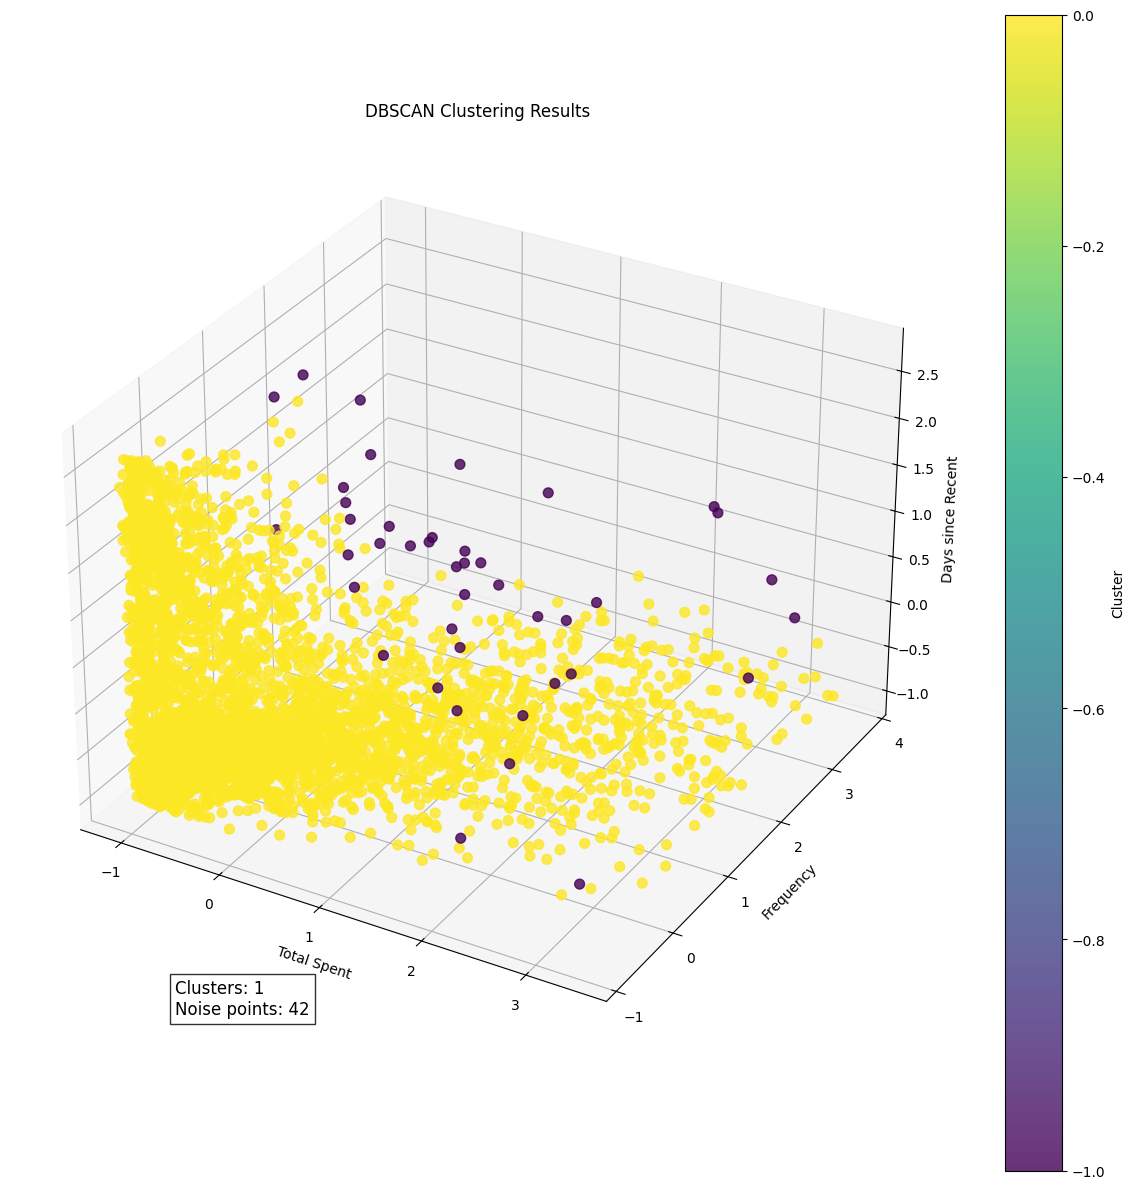

In [8]:
from sklearn.cluster import DBSCAN

dbscan_model = DBSCAN(eps=0.5, min_samples=5)
dbscan_clusters = dbscan_model.fit_predict(dbs_df_train)

dbs_df['Cluster'] = dbscan_clusters

if len(set(dbscan_clusters)) > 1 and -1 not in dbscan_clusters:
    silhouette_avg = silhouette_score(dbs_df_train, dbscan_clusters)
    davies_bouldin = davies_bouldin_score(dbs_df_train, dbscan_clusters)
    calinski_harabasz = calinski_harabasz_score(dbs_df_train, dbscan_clusters)
    
    print("DBSCAN Clustering Performance Metrics:")
    print(f"Silhouette Score: {silhouette_avg:.4f}")
    print(f"Davies-Bouldin Index: {davies_bouldin:.4f}")
    print(f"Calinski-Harabasz Index: {calinski_harabasz:.4f}")
    
    metrics_text = f"Silhouette: {silhouette_avg:.4f}\nDavies-Bouldin: {davies_bouldin:.4f}\nCalinski-Harabasz: {calinski_harabasz:.4f}"
else:
    print("DBSCAN Clustering Results:")
    print(f"Number of clusters: {len(set(dbscan_clusters)) - (1 if -1 in dbscan_clusters else 0)}")
    print(f"Number of noise points: {list(dbscan_clusters).count(-1)}")
    
    metrics_text = f"Clusters: {len(set(dbscan_clusters)) - (1 if -1 in dbscan_clusters else 0)}\nNoise points: {list(dbscan_clusters).count(-1)}"

fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(projection="3d")

scatter = ax.scatter(
    dbs_df["TotalSpent"], 
    dbs_df["Frequency"], 
    dbs_df["DaysSinceLastPurchase"],
    c=dbs_df["Cluster"],
    cmap='viridis',
    s=50,
    alpha=0.8
)

cbar = plt.colorbar(scatter)
cbar.set_label('Cluster')

ax.set_xlabel("Total Spent")
ax.set_ylabel("Frequency")
ax.set_zlabel("Days since Recent")
ax.set_title("DBSCAN Clustering Results")

plt.figtext(0.15, 0.15, metrics_text, fontsize=12, bbox=dict(facecolor='white', alpha=0.8))

plt.tight_layout()


### DBscan clustering mendapatkan hasil yang kurang bagus, hanya mendapatkan 1 cluster dan noise

Gaussian Mixture Clustering Performance Metrics:
Number of clusters: 4
Silhouette Score: 0.1248
Davies-Bouldin Index: 1.4653
Calinski-Harabasz Index: 1476.6196


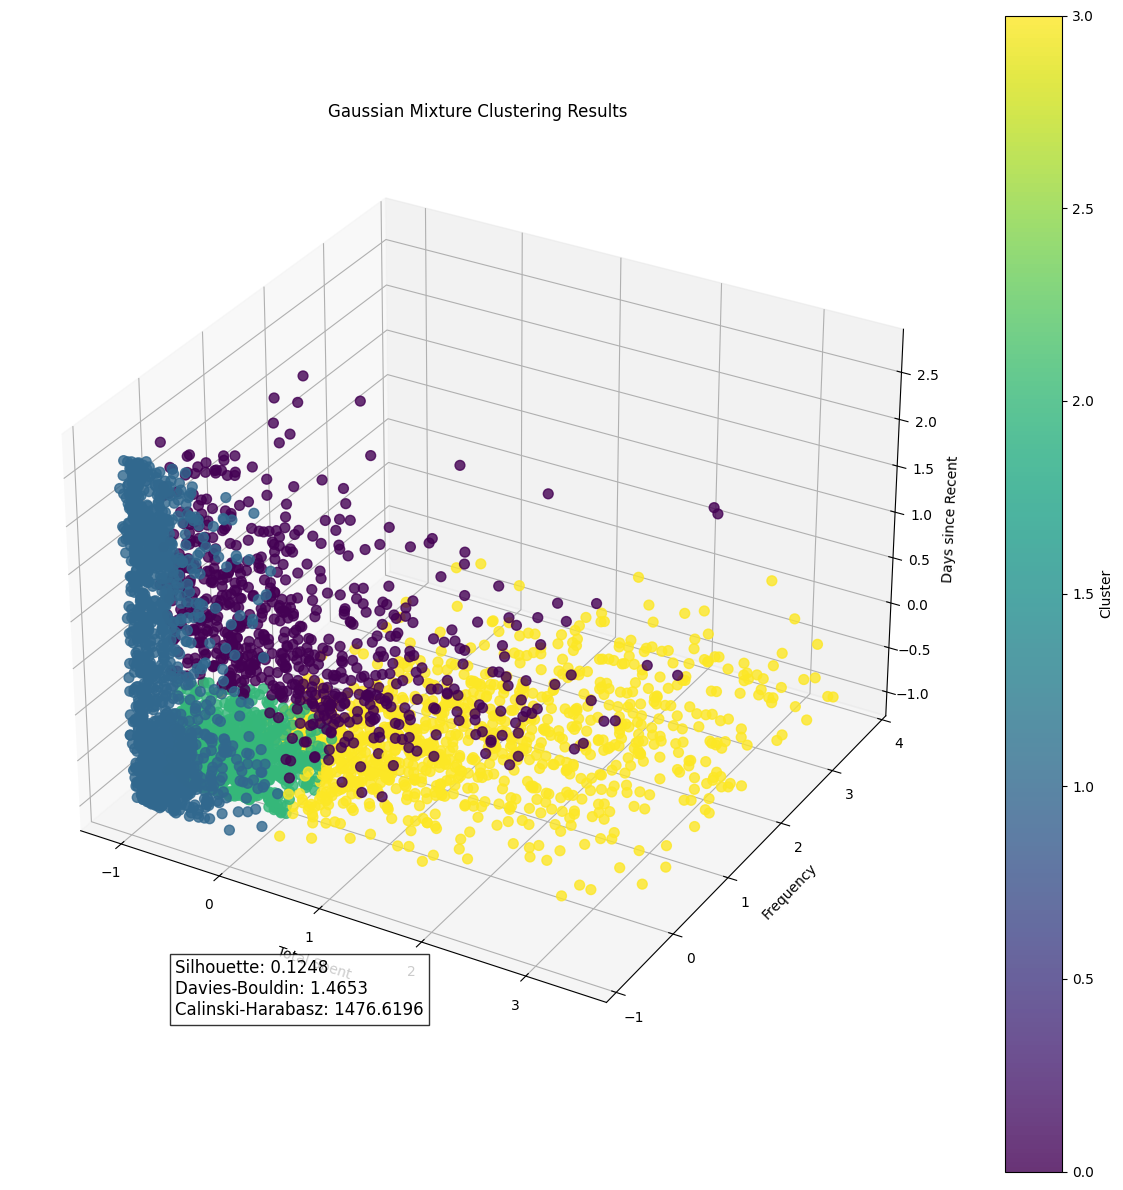

In [9]:
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
import matplotlib.pyplot as plt
import numpy as np

n_components = clusters
gm_model = GaussianMixture(n_components=n_components, random_state=42)

gm_clusters = gm_model.fit_predict(gaus_df_train)

gaus_df['Cluster'] = gm_clusters

silhouette_avg = silhouette_score(gaus_df_train, gm_clusters)
davies_bouldin = davies_bouldin_score(gaus_df_train, gm_clusters)
calinski_harabasz = calinski_harabasz_score(gaus_df_train, gm_clusters)

print("Gaussian Mixture Clustering Performance Metrics:")
print(f"Number of clusters: {n_components}")
print(f"Silhouette Score: {silhouette_avg:.4f}")
print(f"Davies-Bouldin Index: {davies_bouldin:.4f}")
print(f"Calinski-Harabasz Index: {calinski_harabasz:.4f}")

metrics_text = f"Silhouette: {silhouette_avg:.4f}\nDavies-Bouldin: {davies_bouldin:.4f}\nCalinski-Harabasz: {calinski_harabasz:.4f}"

fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(projection="3d")

scatter = ax.scatter(
    gaus_df["TotalSpent"], 
    gaus_df["Frequency"], 
    gaus_df["DaysSinceLastPurchase"],
    c=gaus_df["Cluster"],
    cmap='viridis',
    s=50,
    alpha=0.8
)

cbar = plt.colorbar(scatter)
cbar.set_label('Cluster')

ax.set_xlabel("Total Spent")
ax.set_ylabel("Frequency")
ax.set_zlabel("Days since Recent")
ax.set_title("Gaussian Mixture Clustering Results")

plt.figtext(0.15, 0.15, metrics_text, fontsize=12, bbox=dict(facecolor='white', alpha=0.8))

plt.tight_layout()


Secara visual sepertinya masih belum sebagus KMeans jika 4 cluster

Spectral Clustering Performance Metrics:
Number of clusters: 4
Silhouette Score: 0.1399
Davies-Bouldin Index: 1.4698
Calinski-Harabasz Index: 1244.2682


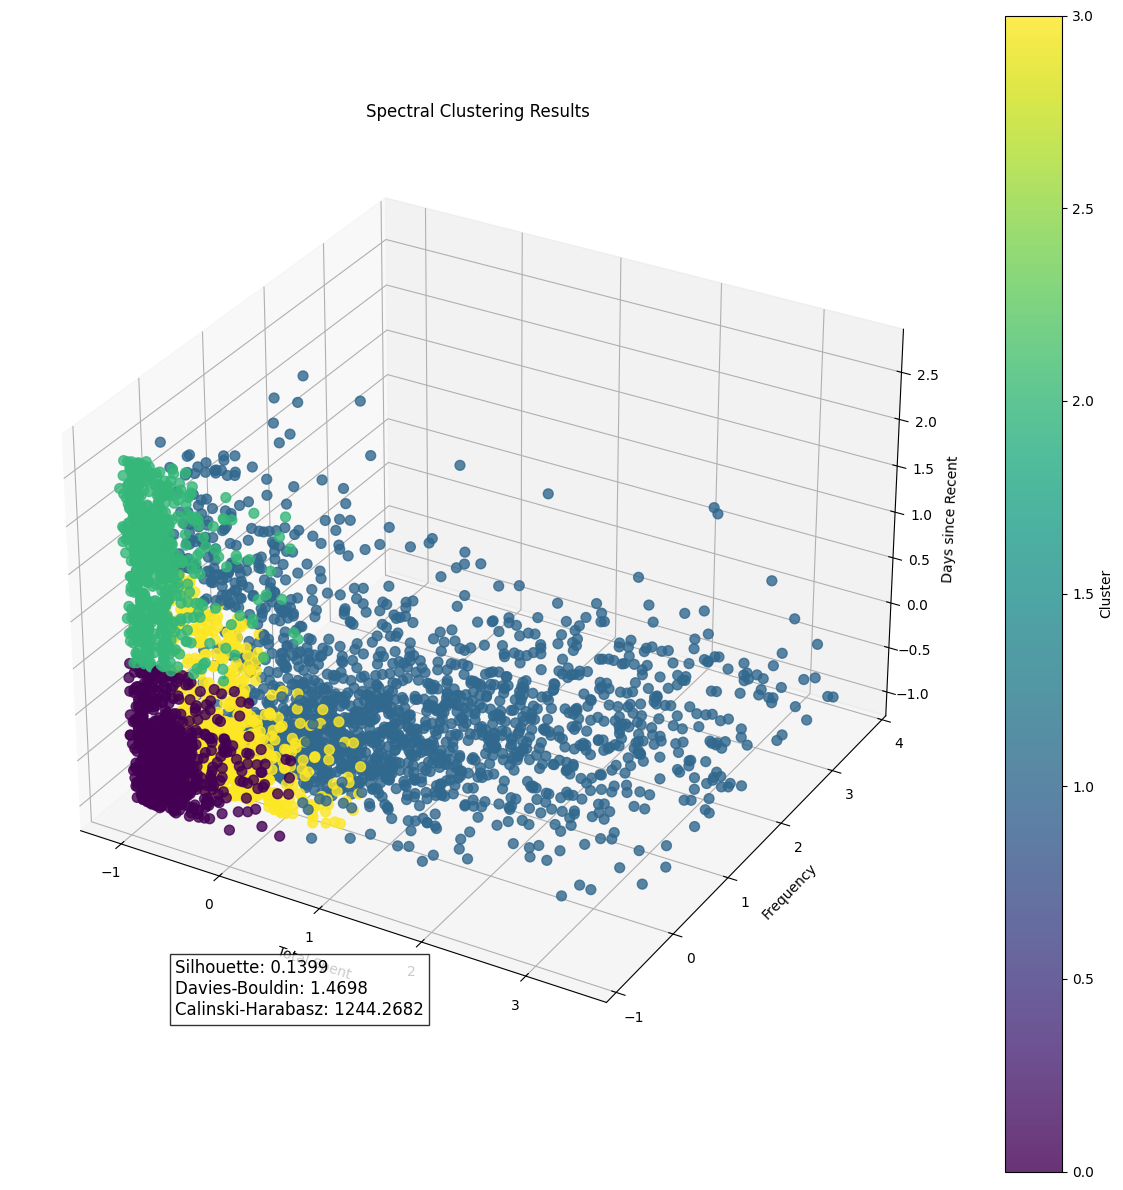

In [10]:
from sklearn.cluster import SpectralClustering

n_components = clusters
spec_model = SpectralClustering(n_clusters=n_components, random_state=42, affinity='nearest_neighbors')

spec_clusters = spec_model.fit_predict(spec_df_train)

spec_df['Cluster'] = spec_clusters

silhouette_avg = silhouette_score(spec_df_train, spec_clusters)
davies_bouldin = davies_bouldin_score(spec_df_train, spec_clusters)
calinski_harabasz = calinski_harabasz_score(spec_df_train, spec_clusters)

print("Spectral Clustering Performance Metrics:")
print(f"Number of clusters: {n_components}")
print(f"Silhouette Score: {silhouette_avg:.4f}")
print(f"Davies-Bouldin Index: {davies_bouldin:.4f}")
print(f"Calinski-Harabasz Index: {calinski_harabasz:.4f}")

metrics_text = f"Silhouette: {silhouette_avg:.4f}\nDavies-Bouldin: {davies_bouldin:.4f}\nCalinski-Harabasz: {calinski_harabasz:.4f}"

fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(projection="3d")

scatter = ax.scatter(
    spec_df["TotalSpent"], 
    spec_df["Frequency"], 
    spec_df["DaysSinceLastPurchase"],
    c=spec_df["Cluster"],
    cmap='viridis',
    s=50,
    alpha=0.8
)

cbar = plt.colorbar(scatter)
cbar.set_label('Cluster')

ax.set_xlabel("Total Spent")
ax.set_ylabel("Frequency")
ax.set_zlabel("Days since Recent")
ax.set_title("Spectral Clustering Results")

plt.figtext(0.15, 0.15, metrics_text, fontsize=12, bbox=dict(facecolor='white', alpha=0.8))

plt.tight_layout()


Sama, secara visual sepertinya masih belum sebagus KMeans jika 4 cluster.